Week 4:

Q2. Implement a Convolutional Neural Network (CNN) to classify handwritten digits in the MNIST
dataset.


Ashwin Saji


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Dropout,Input

In [3]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

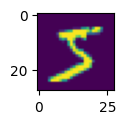

In [7]:
plot_sample(0)

In [8]:
y_train[0]

np.uint8(5)

In [9]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [10]:
ip_shape=(28,28,1)
op_shape=10

CNN Model

In [11]:
model=keras.Sequential([
    Input(shape=ip_shape),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10,activation='softmax')
])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# history=model.fit(X_train_scaled,y_train,epochs=5)
# %%timeit -n1 -r1
with tf.device('/CPU:0'):
    history=model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8970 - loss: 0.3267
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9813 - loss: 0.0583
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9869 - loss: 0.0411
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9897 - loss: 0.0313
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9932 - loss: 0.0215
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9942 - loss: 0.0190
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9943 - loss: 0.0161
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9960 - loss: 0.0118
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0130


In [ ]:
# y=model.predict(X_test[0])

In [29]:
loss, acc = model.evaluate(X_test_scaled, y_test, batch_size=10)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9895 - loss: 0.0413

Test accuracy: 99.2%


In [30]:
loss_train_cnn, acc_train_cnn = model.evaluate(X_train_scaled, y_train, batch_size=10)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc_train_cnn))

6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9989 - loss: 0.0042

Train accuracy: 99.9%


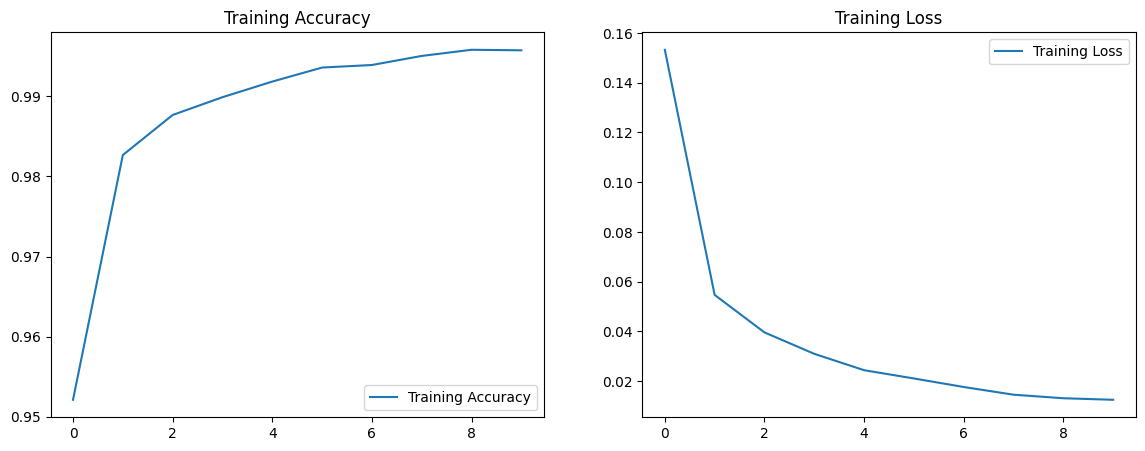

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

# plt.savefig('./foo.png')
plt.show()

In [19]:
# model.evaluate(X_test_scaled, y_test, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# classification_report(y_train,y_test)

ANN Model

In [20]:
ann=tf.keras.Sequential([
    Input(shape=ip_shape),
    Flatten(),
    Dense(700,activation='relu'),
    Dropout(0.25),
    Dense(300,activation='relu'),
    Dense(10,activation='softmax')
])

In [21]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 700)            │       549,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       210,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 762,810 (2.91 MB)

 Trainable params: 762,810 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# %%timeit -n1 -r1
with tf.device('/CPU:0'):
    history_ann=ann.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8949 - loss: 0.3378
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1034
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9761 - loss: 0.0742
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0622
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0546
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0457
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0386
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0372
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0306
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0322


In [24]:
loss, acc = ann.evaluate(X_test_scaled, y_test, batch_size=10)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.9774 - loss: 0.0908

Test accuracy: 98.1%


In [31]:
loss_ann_train, acc_ann_train = ann.evaluate(X_train_scaled, y_train, batch_size=10)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_ann_train))

6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 950us/step - accuracy: 0.9958 - loss: 0.0127

Test accuracy: 99.5%


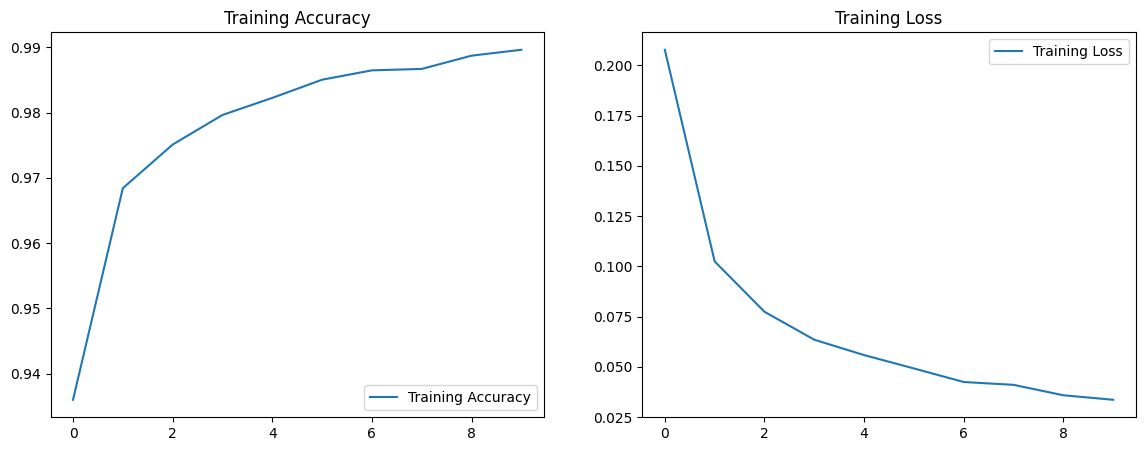

In [26]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

# plt.savefig('./foo.png')
plt.show()

Performance comparison between CNN and ANN,

| Model | Training time  | Accuracy(test) | Accuracy(train) |
|:------|:------|:------|:------|
| CNN | 67s | 99.2% | 99.9% |
| ANN | 55.3s | 98.1% | 99.5% |

Remarks: CNN gives better accuracy on testing dataset but takes slightly longer to train

Insights: Unlike ANNs, which are fully connected, CNNs utilize a series of convolutional layers that scan data in small regions. This approach enables CNNs to capture complex features in visual data, making them highly effective for image recognition and classification tasks.